<a href="https://colab.research.google.com/github/iampundir/Text-Analytics/blob/main/Text_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded=files.upload()

Saving The Maze Runner.csv to The Maze Runner.csv


In [4]:
!ls

 sample_data  'The Maze Runner.csv'


In [48]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt


In [49]:
reviews=pd.read_csv("The Maze Runner.csv",index_col=0)
reviews.head()

,Ratings,Reviews
0,1/10,"My English is so bad, I don't speak English, ..."
1,1/10,The trailer got me into the cinema and it was...
2,4/10,I went into this film with low expectations. ...
3,3/10,While I was happy to finally see a male-orien...
4,7/10,It's rare for a big movie studio to trust the...


In [50]:
only_reviews = reviews.Reviews

In [51]:
all_reviews_text = " ".join(only_reviews)

In [52]:
all_reviews_text

' My English is so bad, I don\'t speak English, but i\'m trying hard to write this review! so you knew my disappointment Don\'t waste your time and money watching this. I keep on cursing during the movie. They been there for 3 years, why not build a ladder, so when the runner late coming, they can climb back to the glade. The wall is still reachable, they have plenty of trees, knifes, axe, rope etc.. Even kids will build a ladder.. even you can make a HOLE on the wall very easy!! its shown when Galby make people name on wall very easy.Newt said, "trust me. we have tried everything" while gardening. You put a group of young man with no supervision and they they will become a farmer??? OMG this is insulting. No violence? c\'mon... After 3 years they send Thomas to the glade. why? never explain clearly.. because all the guys were doing nothing but gardening? Even Thomas had to sting his self and got cured so he can remember things, but when he remember things, so what ? it doesn\'t solve 

In [53]:
all_reviews_text = all_reviews_text.lower()

In [54]:
wc=WordCloud(width=800,height=600,max_words=200,stopwords=STOPWORDS,regexp="[a-z']+")

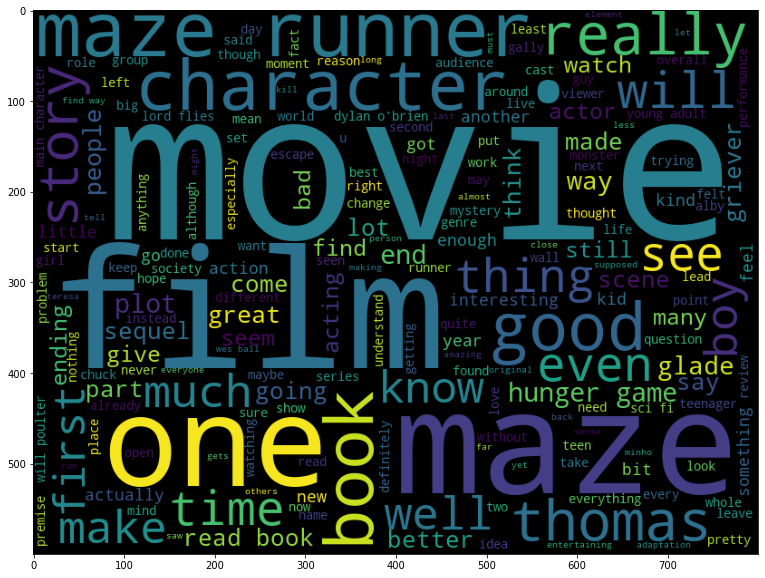

In [55]:
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(all_reviews_text))

In [65]:
tf = CountVectorizer(token_pattern="[a-z']+",stop_words=STOPWORDS,ngram_range=(2,2))

In [66]:
tf_mat =tf.fit_transform(reviews.Reviews)
tf_mat

<500x55526 sparse matrix of type '<class 'numpy.int64'>'
	with 69431 stored elements in Compressed Sparse Row format>

In [67]:
d1={k:v for k, v in sorted(tf.vocabulary_.items(),key=lambda item: item[1])}

In [68]:
v=tf_mat.sum(axis=0) #we trying to get the total sum 

In [69]:
v1=v.tolist()[0]

In [70]:
len(v1)# number of columns

55526

In [71]:
tf.vocabulary_ #the numbers is column index not the frequency

{'english bad': 13660,
 'bad speak': 3806,
 'speak english': 45063,
 'english trying': 13669,
 'trying hard': 50971,
 'hard write': 21976,
 'write review': 54921,
 'review knew': 39899,
 'knew disappointment': 25285,
 'disappointment waste': 11912,
 'waste time': 52898,
 'time money': 49932,
 'money watching': 30469,
 'watching keep': 53131,
 'keep cursing': 24734,
 'cursing movie': 10310,
 'movie years': 31509,
 'years build': 55182,
 'build ladder': 6279,
 'ladder runner': 25671,
 'runner late': 40699,
 'late coming': 25832,
 'coming climb': 8737,
 'climb back': 8339,
 'back glade': 3649,
 'glade wall': 20020,
 'wall still': 52642,
 'still reachable': 45852,
 'reachable plenty': 38548,
 'plenty trees': 36368,
 'trees knifes': 50671,
 'knifes axe': 25310,
 'axe rope': 3622,
 'rope etc': 40366,
 'etc even': 14396,
 'even kids': 14541,
 'kids will': 25031,
 'will build': 53988,
 'ladder even': 25661,
 'even make': 14559,
 'make hole': 28129,
 'hole wall': 22572,
 'wall easy': 52626,
 'e

In [74]:
d2= {k1:v2 for k1,v2 in zip(d1.keys(),v1)}

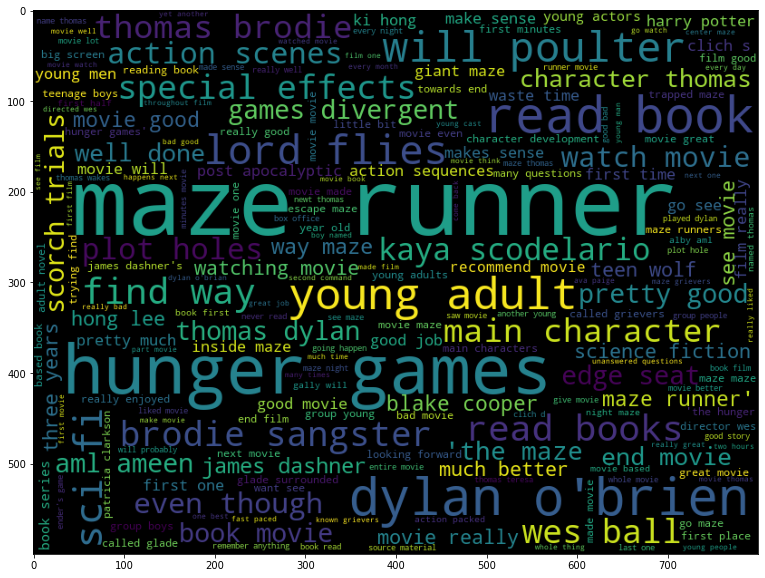

In [76]:
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_frequencies(d2))